In [47]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, random_state=42)

In [48]:
# Initialize the Kmeans & perform fit on X
from sklearn.cluster import KMeans
kk = KMeans(n_clusters = 3)
kk.fit(X)
# kk.labels_

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


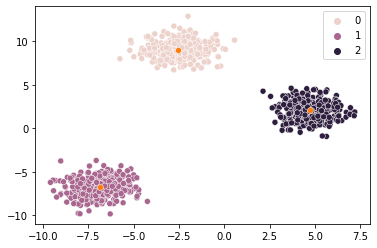

In [49]:
# Create scatter plot & along with Cluster ID with Cluster Center in the plot
import seaborn as sns
sns.scatterplot(X[:,0], X[:,1], hue=kk.labels_)
sns.scatterplot(kk.cluster_centers_[:,0], kk.cluster_centers_[:,1], palette=["green"])
# Matplotlib/seaborn

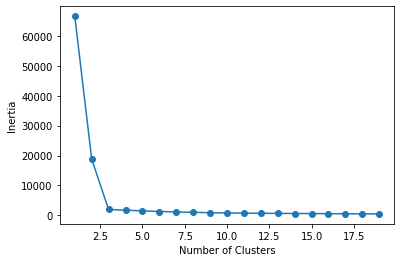

In [64]:
# Try the fit for various value of k = (1,20) , and check which value of k is suitable for given dataset
inertia = []
cluster_range = range(1,20)
for k in cluster_range:
  kk = KMeans(n_clusters=k)
  kk.fit(X)
  inertia.append(kk.inertia_)
# Elbow plot
import matplotlib.pyplot as plt


plt.plot(cluster_range,inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.show()

In [65]:
# Print - inertia for model chosen
kk = KMeans(n_clusters=2)
kk.fit(X)
kk.inertia_

18773.018255690862

In [66]:
# number of iteration system took to perform the fit
kk.n_iter_

2

##silhouette score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [68]:
# Use the Metric - silhouette score, and compute on the dataset


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [75]:
from sklearn.metrics import silhouette_score
metric = silhouette_score(X,kk.labels_)
metric

0.7052841810631846